In [ ]:
from random import randint
import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
N = 10 # number of bits
alpha = 0.1
I = [2,5,8,10]
S = 1000000 # samples

In [ ]:
probForEachSample = np.zeros((len(I),S))
# probForEachSample=[]

In [ ]:
for i in range(len(I)):
  tmpNum = 0.0
  tmpDen = 0.0
  for s in range(1,S+1):
    B = []
    for b in range(1,N+1):  # random bits for this sample
      B.append(randint(0,1))
    Indicator = int(B[I[i]-1] == 1)
    
    tmp = 0
    for b in range(1,N+1):
      tmp+=((pow(2,(b-1)))*B[b-1])
    # print(s,tmp)
    tmp = 128 - tmp
    # print(s,tmp)
    # print("abs",abs(tmp))
    secondTerm = pow(alpha,abs(tmp))
    # print(s,"secondTerm",secondTerm)
    tmpNum += (Indicator*secondTerm)
    tmpDen += secondTerm
    # print(tmpNum,tmpDen)
    if tmpDen == 0:
      if s==1:
        probForEachSample[i,s-1] = 0
      else:
        probForEachSample[i,s-1] = probForEachSample[i,s-2]
    else:  
      probForEachSample[i,s-1] = tmpNum/tmpDen
  # probForEachSample.append(tmpNum/tmpDen)


In [ ]:
print("Finals Answers:")
for i in range(len(I)):
  print(I[i],": ",probForEachSample[i,S-1])

Finals Answers:
2 :  0.10408707182850167
5 :  0.0895519134875286
8 :  0.9109719376915066
10 :  0.0


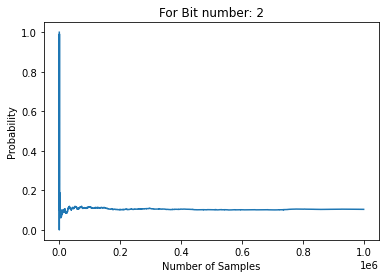

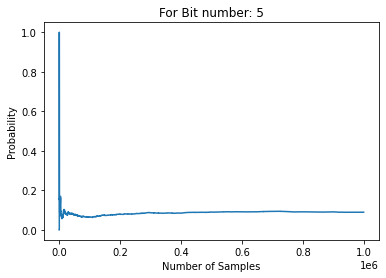

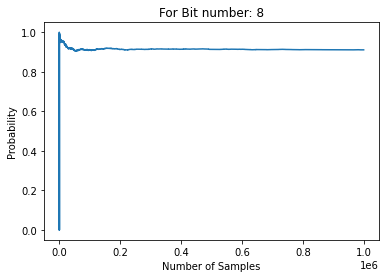

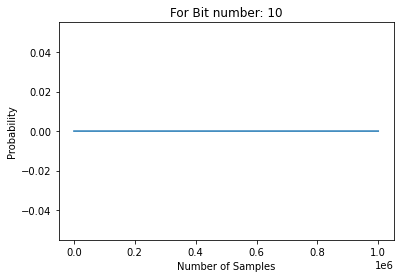

In [ ]:
# Printing graph
for i in range(len(I)):
  plt.plot(range(1,S+1),probForEachSample[i])
  plt.title("For Bit number: "+str(I[i]))
  plt.xlabel('Number of Samples')
  plt.ylabel('Probability')
  plt.show()
